# Project One - visualization future stock price/test portfolio


In [1]:
# Initial imports
import os
import requests
import pandas as pd
import numpy as np
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
import yfinance as yf
from datetime import datetime 
import pandas_datareader.data as web
from MCForecastTools import MCSimulation
import matplotlib.pyplot as plt
from matplotlib import style

%matplotlib inline

style.use('ggplot')

In [2]:
# Load .env enviroment variables
load_dotenv("/Users/brennanseanm/Jupyter-Workspace/.env")

True

## Part 1 - Pull in data using Yahoo Finance

In [3]:
#Downloading stock infromatino from Yahoo Finance
#aapl_df = yf.download("aapl", start='2016-04-05', end="2021-04-01")
#tsla_df2 = yf.download("tsla", start='2015-03-03', end="2019-04-23")
#amzn_df2 = yf.download("amzn", start='2015-03-03', end="2019-04-23")
#msft_df2 = yf.download("msft", start='2015-03-03', end="2019-04-23")
#goog_df2 = yf.download("goog", start='2015-03-03', end="2019-04-23")

#Dropping extra columns and renaming close column to be able to combine data into a clean data frame for analysis
#aapl_df = aapl_df.drop(columns = ['Open', 'High', 'Low', 'Close', 'Volume'])
#tsla_df2 = tsla_df2.drop(columns = ['Open', 'High', 'Low', 'Adj Close', 'Volume']).rename(columns = {'Close':'TSLA'})
#amzn_df2 = amzn_df2.drop(columns = ['Open', 'High', 'Low', 'Adj Close', 'Volume']).rename(columns = {'Close':'AMZN'})
#msft_df2 = msft_df2.drop(columns = ['Open', 'High', 'Low', 'Adj Close', 'Volume']).rename(columns = {'Close':'MSFT'})
#goog_df2 = goog_df2.drop(columns = ['Open', 'High', 'Low', 'Adj Close', 'Volume']).rename(columns = {'Close':'GOOG'})

In [4]:
#Set the start date and end date to pull up to 5 years of data
startdate = '2016-04-05'
today = datetime.today().strftime('%Y-%m-%d')

startdate, today

('2016-04-05', '2021-04-12')

In [5]:
#Choose a stock and pull the stock price via Yahoo using DataReader to test MC simualation on Stock Price
ticker = ('AMZN')
price = web.DataReader(ticker, data_source = 'yahoo', start = startdate, end = today)['Adj Close']


In [6]:
#Display data for the adjusted close price from Yahoo
price

Date
2016-04-05     586.140015
2016-04-06     602.080017
2016-04-07     591.429993
2016-04-08     594.599976
2016-04-11     595.929993
                 ...     
2021-04-06    3223.820068
2021-04-07    3279.389893
2021-04-08    3299.300049
2021-04-09    3372.199951
2021-04-12    3386.468506
Name: Adj Close, Length: 1264, dtype: float64

In [7]:
#Calculate daily return and volatiltiy so these variables can be leveraged for the MC Simulation
daily_return = price.pct_change()
daily_vol = daily_return.std()

#View data to validate the calculation values
daily_return, daily_vol

(Date
 2016-04-05         NaN
 2016-04-06    0.027195
 2016-04-07   -0.017689
 2016-04-08    0.005360
 2016-04-11    0.002237
                 ...   
 2021-04-06   -0.000902
 2021-04-07    0.017237
 2021-04-08    0.006071
 2021-04-09    0.022096
 2021-04-12    0.004231
 Name: Adj Close, Length: 1264, dtype: float64,
 0.018530731760007465)

In [8]:
#Define a value for last price to leverage in the MC simulation graph
last_price = price[-1]
last_price

3386.468505859375

In [9]:
#Monte Carlo Simulation setup with plan to run 50 scenarios for one year stock price 
num_simu = 500
num_days = 252

#Create DataFrame for simulation
simulation_df = pd.DataFrame()

In [10]:
#Function created for MC daily price similation for one year

for x in range(num_simu):
    count = 0
    daily_vol = daily_return.std()
    
    price_series = []
    
    prices = last_price *(1 + np.random.normal(0, daily_vol))
    price_series.append(prices)
    
    for y in range(num_days):
        if count == 251:
            break
        prices = price_series[count]*(1+np.random.normal(0, daily_vol))
        price_series.append(prices)
        count += 1
    
    simulation_df[x] = price_series


simulation_df

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,3347.133747,3457.511011,3369.196355,3365.554611,3381.024137,3344.485615,3381.602614,3323.068799,3285.014726,3436.194668,...,3462.634652,3354.134998,3404.978700,3419.939810,3228.537321,3473.742708,3401.286740,3432.643563,3415.941960,3432.158118
1,3421.233665,3518.879315,3365.677427,3455.765355,3370.661806,3329.854062,3396.931608,3399.757849,3353.365239,3326.927663,...,3463.391220,3401.944783,3547.553138,3361.763807,3269.942151,3447.195785,3370.547126,3492.739746,3407.812481,3259.572381
2,3335.816058,3596.488963,3444.042540,3429.068503,3377.674152,3394.239440,3402.430649,3524.873308,3319.048456,3367.474274,...,3419.988698,3373.418065,3580.569006,3399.181898,3204.225333,3414.351377,3488.844569,3595.676139,3411.264640,3291.532052
3,3203.524004,3587.214598,3413.461071,3379.828175,3401.282153,3362.048183,3367.238378,3535.238407,3329.326728,3331.265764,...,3416.516583,3434.010816,3514.197690,3244.433112,3261.356204,3454.247698,3429.609679,3541.315871,3319.743402,3160.466668
4,3211.043222,3665.578299,3318.070663,3412.610700,3509.624202,3283.826853,3259.960942,3499.058096,3280.456673,3343.252605,...,3380.834851,3419.008971,3616.231976,3249.021094,3257.347629,3401.622631,3376.398930,3588.898211,3354.084800,3035.198039
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
247,2256.033215,3907.463478,3759.523814,5260.011359,3014.603360,2843.718902,2711.465032,2344.389183,4211.588803,4315.520052,...,3996.246467,3105.207021,2631.504446,3558.048931,1773.177249,3874.565518,3947.673890,2173.092776,3518.928277,3187.115216
248,2275.213659,3790.464497,3754.398080,5179.784938,3009.447500,2858.463725,2687.404503,2330.407935,4225.514765,4313.127250,...,4038.581582,3121.322884,2626.936103,3539.056579,1743.952656,3961.290401,3942.636436,2150.439499,3479.700243,3207.392993
249,2261.806287,3811.708731,3820.659693,5205.788922,3018.850921,2768.410049,2733.302539,2313.111451,4230.535741,4220.120657,...,4143.276128,3265.324657,2612.843190,3458.484162,1777.563243,4077.055667,4036.780076,2146.176076,3564.096834,3259.515390
250,2266.637399,3730.557728,3813.283583,5104.066996,3003.476110,2704.307005,2784.394577,2344.057855,4074.677070,4210.546283,...,4210.511406,3256.265589,2714.518323,3496.920224,1700.936865,4053.912858,4114.355988,2088.903487,3531.889573,3357.247453


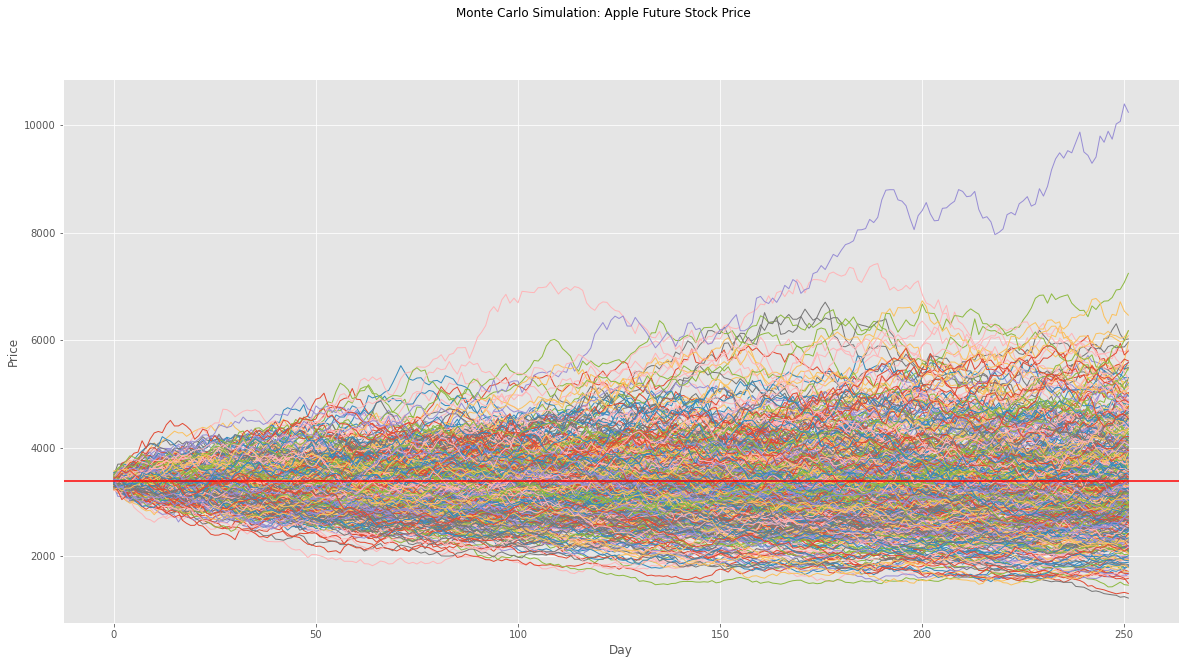

In [11]:
#Graph results to display future price volitity in the model
fig = plt.figure(figsize=(20,10))
fig.suptitle('Monte Carlo Simulation: Apple Future Stock Price')
plt.plot(simulation_df, lw = 1)
plt.axhline(y = last_price, color = 'r', linestyle = '-')
plt.xlabel('Day')
plt.ylabel('Price')
plt.show()

In [12]:
# Calculate 95% confidence intervals for final cumulative returns
confidence_interval = simulation_df.iloc[-1, :].quantile(q=[0.025, 0.975])

#Calculate and display confidence metrics 
metrics = simulation_df.iloc[-1].describe()
ci_series = confidence_interval
ci_series.index = ["95% CI Lower","95% CI Upper"]
final_stats = metrics.append(ci_series)
final_stats

count             500.000000
mean             3388.207257
std              1043.414774
min              1221.579685
25%              2654.707702
50%              3257.241089
75%              3995.580974
max             10232.704669
95% CI Lower     1790.189287
95% CI Upper     5592.554264
Name: 251, dtype: float64

In [13]:
# Set initial investment on 200 shares of stock in selected stock
initial_shares = 200
initial_investment = round(initial_shares * last_price,2)

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
ci_lower = round(final_stats[8]*initial_shares,2)
ci_upper = round(final_stats[9]*initial_shares,2)

# Print results
print(f"There is a 95% chance that if you invest ${initial_investment} to purchase {initial_shares} shares in the {ticker}"
      f" over the next year will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that if you invest $677293.7 to purchase 200 shares in the AMZN over the next year will end within in the range of $358037.86 and $1118510.85
